## Preamble

In [47]:
#pip install sympy
#pip install numpy
#pip install pandas
#pip install matplotlib

In [3]:
import numpy as np
from sympy import symbols, Eq, solve
from sympy.interactive import printing
from sympy import pi
import pandas as pd
import matplotlib.pyplot as plt

## Calibration

### Import data

In [44]:
# File import
with open('Messung051224\GreaseDataVacuum1.txt', 'r') as file:
    lines = file.readlines()[0:]

data = []
for line in lines:
    # Split
    parts = line.split()
    
    # Bye first column
    row = parts[2:]
    data.append(row)

# Column names
columns = [
     "Frequency", "Re(1ω)", "Im(1ω)", "Re(3ω)", "Im(3ω)", "Phase(1ω)", "Phase(3ω)",
    "Vref", "Current", "Re(ΔT)", "Δ[Re(ΔT)]", "Im(ΔT)", "Δ[Im(ΔT)]", "Power", "Temperature"
]

# DataFrame
df = pd.DataFrame(data, columns=columns)
print(df)

   Frequency             Re(1ω)              Im(1ω)             Re(3ω)  \
0     10.000  0.184437030678751   0.000000000000000  0.000260408972433   
1     12.743  0.184472240125837  -0.000000000000002  0.000250413696423   
2     16.238  0.184501818686206   0.000000000000003  0.000240364494020   
3     20.691  0.184498163976574  -0.000000000000004  0.000230400186952   
4     26.367  0.184483429107614  -0.000000000000009  0.000220346733487   
5     33.598  0.184483383143853   0.000000000000008  0.000210358465422   
6     42.813  0.184477957645594  -0.000000000000012  0.000200464729980   
7     54.556  0.184489963431298   0.000000000000024  0.000190646474419   
8     69.519  0.184495500931581  -0.000000000000004  0.000180890595175   
9     88.587  0.184485577328355  -0.000000000000013  0.000171116220837   
10   112.884  0.184482208698789  -0.000000000000051  0.000161477505982   
11   143.845  0.184473045251364   0.000000000000035  0.000151907959337   
12   183.298  0.184467308804337   0.00

<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\rinc\AppData\Local\Temp\ipykernel_17572\2207145692.py:2: SyntaxWarning: invalid escape sequence '\G'
  with open('Messung051224\GreaseDataVacuum1.txt', 'r') as file:


In [45]:
df

,Frequency,Re(1ω),Im(1ω),Re(3ω),Im(3ω),Phase(1ω),Phase(3ω),Vref,Current,Re(ΔT),Δ[Re(ΔT)],Im(ΔT),Δ[Im(ΔT)],Power,Temperature
0,10.000,0.184437030678751,0.000000000000000,0.000260408972433,-0.000065735910170,0.000000000000056,-14.167387803957695,0.052110,0.005211,0.824032,0.000000,-0.208013,0.009426,0.000961,27.28
1,12.743,0.184472240125837,-0.000000000000002,0.000250413696423,-0.000065420904660,-0.000000000000486,-14.641350469289304,0.052121,0.005212,0.792244,0.000000,-0.206975,0.009379,0.000961,27.28
2,16.238,0.184501818686206,0.000000000000003,0.000240364494020,-0.000065107642367,0.000000000000918,-15.156050153835725,0.052124,0.005212,0.760411,0.000000,-0.205973,0.009333,0.000962,27.31
3,20.691,0.184498163976574,-0.000000000000004,0.000230400186952,-0.000064640280522,-0.000000000001258,-15.671811641969777,0.052125,0.005212,0.728871,0.000000,-0.204490,0.009266,0.000962,27.30
4,26.367,0.184483429107614,-0.000000000000009,0.000220346733487,-0.000064252819370,-0.000000000002679,-16.256615346477268,0.052123,0.005212,0.697096,0.000000,-0.203272,0.009211,0.000962,27.29
5,33.598,0.184483383143853,0.000000000000008,0.000210358465422,-0.000064077268966,0.000000000002331,-16.941254294225349,0.052121,0.005212,0.665514,0.000000,-0.202722,0.009186,0.000962,27.29
6,42.813,0.184477957645594,-0.000000000000012,0.000200464729980,-0.000063519624771,-0.000000000003577,-17.581422057362371,0.052126,0.005213,0.634156,0.000000,-0.200940,0.009106,0.000962,27.26
7,54.556,0.184489963431298,0.000000000000024,0.000190646474419,-0.000063143966475,0.000000000007560,-18.325372761887511,0.052131,0.005213,0.603036,0.000000,-0.199732,0.009051,0.000962,27.25
8,69.519,0.184495500931581,-0.000000000000004,0.000180890595175,-0.000062695418573,-0.000000000001115,-19.115959558521443,0.052134,0.005213,0.572144,0.000000,-0.198301,0.008986,0.000962,27.24
9,88.587,0.184485577328355,-0.000000000000013,0.000171116220837,-0.000062086086950,-0.000000000003937,-19.942287100112999,0.052132,0.005213,0.541251,0.000000,-0.196382,0.008899,0.000962,27.24


### Korrelationsgleichung fuer die Kalibrierung

In [46]:
# LaTeX rendering
printing.init_printing()

In [218]:
# Define variables
dRdT = symbols('dR/dT')
dVdf= symbols('(dV3w/dlnf)')
dR,dT,L,lambda_grease,lambda_sub,f,P,I = symbols('dR dT L lambda_grease lambda_sub f P I')


In [219]:
equation_dRdT = Eq( ((-4*pi*L)/(P*I))*(lambda_grease+lambda_sub)*(dVdf)- dRdT,0)

In [220]:
display(equation_dRdT)

### dR/dT Berechnung (unter Vacuum)

#### Parameters fuer die Berechnung

In [221]:
# Geometrie und Bedingungen
T_ref=26                  # Room temperature, 24 04.12.24

# Slope dRe(V3w)/dlnf Berechnung
v3w=df['Re(3ω)'].values
f=df['Frequency'].values
v3w=v3w.astype(float)
f=f.astype(float)

## dRdT Berechnung

L_mess=1000e-6
P_mess= df['Power'].values
P_mess=P_mess.astype(float)

I_mess= df['Current'].values
I_mess=I_mess.astype(float)

#### Substrate thermal conductivity

In [222]:
lambda_substrate_ref= 1.2 # Temperature 20C

In [223]:
lambdaSubstrate=lambda lambda_substrate_ref,T: lambda_substrate_ref + 0.0013*(T-20)

#### Slope dRe(V3w)/dln(f)

In [224]:
v3w

array([2.60408972e-04, 2.50413696e-04, 2.40364494e-04, 2.30400187e-04,
       2.20346733e-04, 2.10358465e-04, 2.00464730e-04, 1.90646474e-04,
       1.80890595e-04, 1.71116221e-04, 1.61477506e-04, 1.51907959e-04,
       1.42492229e-04, 1.33228677e-04, 1.24008072e-04, 1.15060106e-04,
       1.06364306e-04, 9.79663101e-05, 8.96253227e-05, 8.31308461e-05])

In [225]:
lnf=np.log(f)

In [226]:
print(v3w)
print(f)
print(lnf)

[2.60408972e-04 2.50413696e-04 2.40364494e-04 2.30400187e-04
 2.20346733e-04 2.10358465e-04 2.00464730e-04 1.90646474e-04
 1.80890595e-04 1.71116221e-04 1.61477506e-04 1.51907959e-04
 1.42492229e-04 1.33228677e-04 1.24008072e-04 1.15060106e-04
 1.06364306e-04 9.79663101e-05 8.96253227e-05 8.31308461e-05]
[  10.      12.743   16.238   20.691   26.367   33.598   42.813   54.556
   69.519   88.587  112.884  143.845  183.298  233.572  297.635  379.269
  483.293  615.848  784.76  1000.   ]
[2.30258509 2.5449821  2.78735417 3.02969882 3.27211323 3.51446654
 3.75684179 3.9992277  4.2416001  4.48398512 4.72636074 4.96873633
 5.21111324 5.45349038 5.6958679  5.93824572 6.18062309 6.42300018
 6.66537794 6.90775528]


Slope: -3.906621169740782e-05, Intercept: 0.0003479401910728244


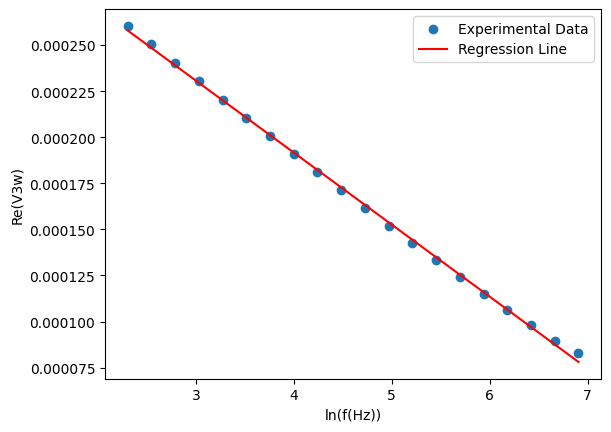

In [227]:
X=lnf
Y=v3w
# Perform linear regression using NumPy's polyfit
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

# Linear regression
Y_pred = slope * X + intercept

# Plot the data and regression line
plt.scatter(X, Y, label='Experimental Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('ln(f(Hz))')
plt.ylabel('Re(V3w)')
plt.legend()
plt.show()

In [228]:
# Sölope 'dV3w/dlnf' calculated for dR/dT calculation

dVdf_mess=slope
print(dVdf_mess)

-3.906621169740782e-05


#### dR/dT Berechnung

In [229]:
P_mean= np.mean(P_mess)
I_mean= np.mean(I_mess)
lambdaGrease_mess= 0.194
lambdaSubstrate_mess=lambdaSubstrate(lambda_substrate_ref,T_ref)
print(P_mean)
print(I_mean)
print(lambdaGrease_mess)
print(lambdaSubstrate_mess)

0.0009617500000000001
0.005212649999999999
0.194
1.2078


In [230]:
substituted_eq = equation_dRdT.subs({P: P_mean, I:I_mean,lambda_grease:lambdaGrease_mess,lambda_sub:lambdaSubstrate_mess,dVdf:dVdf_mess, L:L_mess})

In [231]:
substituted_eq

In [232]:
sol = solve(substituted_eq, dRdT)

In [233]:
dRdT_mess=float(sol[0])
print(dRdT_mess)

0.13727026066039089


## Messung mit gleichem Grease

### Import data

In [234]:
# File import
with open('Messung051224\GreaseDataVacuum1.txt', 'r') as file:
    lines = file.readlines()[0:]

data_sample = []
for line in lines:
    # Split
    parts = line.split()
    
    # Bye first column
    row = parts[2:]
    data_sample.append(row)

# Column names
columns = [
     "Frequency", "Re(1ω)", "Im(1ω)", "Re(3ω)", "Im(3ω)", "Phase(1ω)", "Phase(3ω)",
    "Vref", "Current", "Re(ΔT)", "Δ[Re(ΔT)]", "Im(ΔT)", "Δ[Im(ΔT)]", "Power", "Temperature"
]

# DataFrame
df_sample = pd.DataFrame(data_sample, columns=columns)
print(df_sample)

   Frequency             Re(1ω)              Im(1ω)             Re(3ω)  \
0     10.000  0.184437030678751   0.000000000000000  0.000260408972433   
1     12.743  0.184472240125837  -0.000000000000002  0.000250413696423   
2     16.238  0.184501818686206   0.000000000000003  0.000240364494020   
3     20.691  0.184498163976574  -0.000000000000004  0.000230400186952   
4     26.367  0.184483429107614  -0.000000000000009  0.000220346733487   
5     33.598  0.184483383143853   0.000000000000008  0.000210358465422   
6     42.813  0.184477957645594  -0.000000000000012  0.000200464729980   
7     54.556  0.184489963431298   0.000000000000024  0.000190646474419   
8     69.519  0.184495500931581  -0.000000000000004  0.000180890595175   
9     88.587  0.184485577328355  -0.000000000000013  0.000171116220837   
10   112.884  0.184482208698789  -0.000000000000051  0.000161477505982   
11   143.845  0.184473045251364   0.000000000000035  0.000151907959337   
12   183.298  0.184467308804337   0.00

<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\rinc\AppData\Local\Temp\ipykernel_17572\1898357450.py:2: SyntaxWarning: invalid escape sequence '\G'
  with open('Messung051224\GreaseDataVacuum1.txt', 'r') as file:


In [235]:
dRdT_mess=float(sol[0])

In [236]:
print(dRdT_mess)

0.13727026066039089


### Korrelationsgleichung fuer die Messung

In [262]:
# Define variables
dRdT = symbols('(dR/dT)')
dVdf= symbols('(dV3w/dlnf)')
dR,dT,L,lambda_sample,lambda_sub,f,P,I = symbols('dR dT L lambda_sample, lambda_sub f P I')

In [263]:
equation_lambdaSample= Eq( (-P*I*dRdT/(4*pi*L))*(dVdf)**(-1)-lambda_sub-lambda_sample,0)

In [264]:
display(equation_lambdaSample)

### Thermal conductivity Berechnung

#### Parameters fuer die Berechnung

In [265]:
# Geometrie und Bedingungen
T_ref=26                  # Room temperature
print(dRdT_mess)

# Slope dRe(V3w)/dlnf Berechnung
v3w = df_sample['Re(3ω)'].values
f   = df_sample['Frequency'].values
v3w = v3w.astype(float)
f   = f.astype(float)

## dRdT Berechnung

L_mess=1000e-6
P_mess = df_sample['Power'].values
P_mess = P_mess.astype(float)

I_mess = df_sample['Current'].values
I_mess = I_mess.astype(float)

0.13727026066039089


In [266]:
lambdaSubstrate_mess=lambdaSubstrate(lambda_substrate_ref,T_ref)
lambdaSubstrate_mess

#### Slope dRe(V3w)/dln(f)

In [267]:
v3w

array([2.60408972e-04, 2.50413696e-04, 2.40364494e-04, 2.30400187e-04,
       2.20346733e-04, 2.10358465e-04, 2.00464730e-04, 1.90646474e-04,
       1.80890595e-04, 1.71116221e-04, 1.61477506e-04, 1.51907959e-04,
       1.42492229e-04, 1.33228677e-04, 1.24008072e-04, 1.15060106e-04,
       1.06364306e-04, 9.79663101e-05, 8.96253227e-05, 8.31308461e-05])

In [268]:
f

array([  10.   ,   12.743,   16.238,   20.691,   26.367,   33.598,
         42.813,   54.556,   69.519,   88.587,  112.884,  143.845,
        183.298,  233.572,  297.635,  379.269,  483.293,  615.848,
        784.76 , 1000.   ])

In [269]:
lnf=np.log(f)

In [270]:
lnf

array([2.30258509, 2.5449821 , 2.78735417, 3.02969882, 3.27211323,
       3.51446654, 3.75684179, 3.9992277 , 4.2416001 , 4.48398512,
       4.72636074, 4.96873633, 5.21111324, 5.45349038, 5.6958679 ,
       5.93824572, 6.18062309, 6.42300018, 6.66537794, 6.90775528])

Slope: -3.906621169740782e-05, Intercept: 0.0003479401910728244


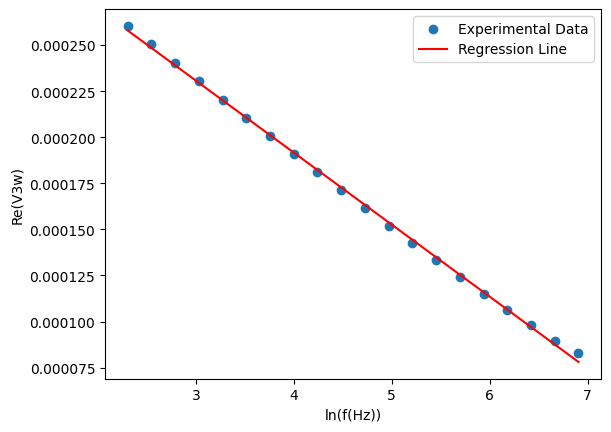

In [271]:
X=lnf
Y=v3w
# Perform linear regression using NumPy's polyfit
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

# Linear regression
Y_pred = slope * X + intercept

# Plot the data and regression line
plt.scatter(X, Y, label='Experimental Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('ln(f(Hz))')
plt.ylabel('Re(V3w)')
plt.legend()
plt.show()

In [272]:
# Sölope 'dV3w/dlnf' calculated for dR/dT calculation

dVdf_mess=slope
print(dVdf_mess)

-3.906621169740782e-05


#### Thermal conductivity der Probe Berechnung

In [273]:
P_mean= np.mean(P_mess)
I_mean= np.mean(I_mess)
print(P_mean)
print(I_mean)
print(lambdaSubstrate_mess)
print(dRdT_mess)

0.0009617500000000001
0.005212649999999999
1.2078
0.13727026066039089


In [274]:
substituted_eqLambdaSample = equation_lambdaSample.subs({dRdT:dRdT_mess,P: P_mean, I:I_mean, lambda_sub:lambdaSubstrate_mess,dVdf:dVdf_mess, L:L_mess})

In [275]:
substituted_eqLambdaSample

In [279]:
solSample = solve(substituted_eqLambdaSample, lambda_sample)
solSample

In [280]:
lambdaSample_mess=float(solSample[0])
lambdaSample_mess

In [281]:
lambdaSubstrate_mess

## Messung mit Substrate unter Vacuum

### Import data

In [283]:
# File import
with open('calibrationdataVacuum.txt', 'r') as file:
    lines = file.readlines()[0:]

data_sample = []
for line in lines:
    # Split
    parts = line.split()
    
    # Bye first column
    row = parts[2:]
    data_sample.append(row)

# Column names
columns = [
     "Frequency", "Re(1ω)", "Im(1ω)", "Re(3ω)", "Im(3ω)", "Phase(1ω)", "Phase(3ω)",
    "Vref", "Current", "Re(ΔT)", "Δ[Re(ΔT)]", "Im(ΔT)", "Δ[Im(ΔT)]", "Power", "Temperature"
]

# DataFrame
df_sample = pd.DataFrame(data_sample, columns=columns)
print(df_sample)

   Frequency             Re(1ω)              Im(1ω)             Re(3ω)  \
0     10.000  0.188154722112770   0.000000000000004  0.000302510967874   
1     12.743  0.188162819633189  -0.000000000000003  0.000291282705193   
2     16.238  0.188168867443238  -0.000000000000007  0.000280038424339   
3     20.691  0.188169867695215   0.000000000000001  0.000269073677081   
4     26.367  0.188170050381801   0.000000000000004  0.000257984198735   
5     33.598  0.188166347450338  -0.000000000000008  0.000246931643538   
6     42.813  0.188168189596023  -0.000000000000018  0.000235947639074   
7     54.556  0.188166593504188  -0.000000000000007  0.000225077381608   
8     69.519  0.188168467447406   0.000000000000024  0.000214065102526   
9     88.587  0.188163172275789   0.000000000000062  0.000203344970307   
10   112.884  0.188162670313110  -0.000000000000017  0.000192279874141   
11   143.845  0.188158629437361  -0.000000000000023  0.000181326550883   
12   183.298  0.188150827525976  -0.00

In [284]:
dRdT_mess=float(sol[0])

In [285]:
print(dRdT_mess)

0.13727026066039089


### Korrelationsgleichung fuer die Messung

In [286]:
# Define variables
dRdT = symbols('(dR/dT)')
dVdf= symbols('(dV3w/dlnf)')
dR,dT,L,lambda_sample,lambda_sub,f,P,I = symbols('dR dT L lambda_sample, lambda_sub f P I')

In [300]:
equation_lambdaSample= Eq( (-P*I*dRdT/(4*pi*L))*(dVdf)**(-1)-lambda_sample,0)

In [301]:
display(equation_lambdaSample)

### Thermal conductivity Berechnung

#### Parameters fuer die Berechnung

In [302]:
# Geometrie und Bedingungen
T_ref=23                  # Room temperature
print(dRdT_mess)

# Slope dRe(V3w)/dlnf Berechnung
v3w = df_sample['Re(3ω)'].values
f   = df_sample['Frequency'].values
v3w = v3w.astype(float)
f   = f.astype(float)

## dRdT Berechnung

L_mess=1000e-6
P_mess = df_sample['Power'].values
P_mess = P_mess.astype(float)

I_mess = df_sample['Current'].values
I_mess = I_mess.astype(float)

0.13727026066039089


#### Slope dRe(V3w)/dln(f)

In [303]:
v3w

array([0.00030251, 0.00029128, 0.00028004, 0.00026907, 0.00025798,
       0.00024693, 0.00023595, 0.00022508, 0.00021407, 0.00020334,
       0.00019228, 0.00018133, 0.00017091, 0.00016004, 0.0001497 ,
       0.00013921, 0.00012922, 0.000119  , 0.00010925, 0.00010145])

In [304]:
f

array([  10.   ,   12.743,   16.238,   20.691,   26.367,   33.598,
         42.813,   54.556,   69.519,   88.587,  112.884,  143.845,
        183.298,  233.572,  297.635,  379.269,  483.293,  615.848,
        784.76 , 1000.   ])

In [305]:
lnf=np.log(f)

In [306]:
lnf

array([2.30258509, 2.5449821 , 2.78735417, 3.02969882, 3.27211323,
       3.51446654, 3.75684179, 3.9992277 , 4.2416001 , 4.48398512,
       4.72636074, 4.96873633, 5.21111324, 5.45349038, 5.6958679 ,
       5.93824572, 6.18062309, 6.42300018, 6.66537794, 6.90775528])

Slope: -4.417865266570014e-05, Intercept: 0.0004023822864243119


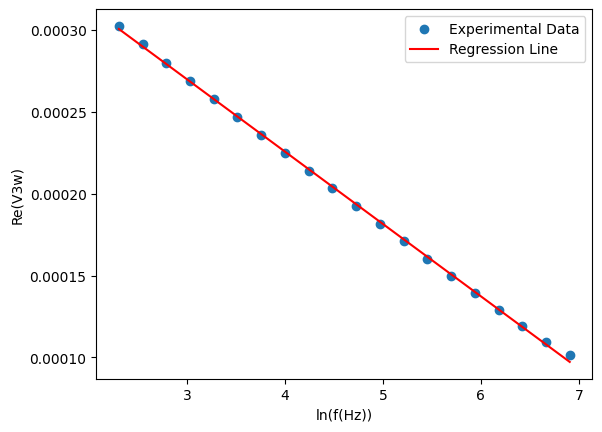

In [307]:
X=lnf
Y=v3w
# Perform linear regression using NumPy's polyfit
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

# Linear regression
Y_pred = slope * X + intercept

# Plot the data and regression line
plt.scatter(X, Y, label='Experimental Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('ln(f(Hz))')
plt.ylabel('Re(V3w)')
plt.legend()
plt.show()

In [308]:
# Sölope 'dV3w/dlnf' calculated for dR/dT calculation

dVdf_mess=slope
print(dVdf_mess)

-4.417865266570014e-05


#### Thermal conductivity der Probe Berechnung

In [309]:
P_mean= np.mean(P_mess)
I_mean= np.mean(I_mess)
print(P_mean)
print(I_mean)
print(lambdaSubstrate_mess)
print(dRdT_mess)

0.001006
0.005348199999999999
1.2039
0.13727026066039089


In [310]:
substituted_eqLambdaSample = equation_lambdaSample.subs({dRdT:dRdT_mess,P: P_mean, I:I_mean,dVdf:dVdf_mess, L:L_mess})

In [311]:
substituted_eqLambdaSample

In [312]:
solSample = solve(substituted_eqLambdaSample, lambda_sample)
solSample

In [313]:
lambdaSample_mess=float(solSample[0])
lambdaSample_mess